<a href="https://colab.research.google.com/github/apledepla/SA2_AFUNDAR_CUERDO_RODILLAS/blob/task2/Tasks_2%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
library(caret)
library(dplyr)
library(rsample)
library(sm)
library(boot)
library(glmnet)
library(ggplot2)
library(tidyr)

Loading required package: Matrix

Loaded glmnet 4.1-10


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [14]:
diabetes_df <- read.csv("/content/diabetes.csv")

head(diabetes_df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


Although other parts of the study have explored inference and resampling methods in the early process to filter out and identify which features are most impactful, the bootstrap and jackknife of this study is to focus on the highest p-value that drives the susceptibility of Diabetes. This study aims to examine **glucose (p-value = 6.75e-06)** and its stability and bias of its estimated mean and regression coefficient.

Although this is the case, task 4: permutation tests reveals that there are other predictors that are significant on the 0.05 p-value threshold. In addition to the glucose, two more predictors, namely **BMI (p-value = 0.003073)** and **Insulin (p-value = 0.017341)**, will also be subject to the resampling method as an additional predictor to the glucose.
Permutation tests identified glucose as highly significant, hence this becomes the main focus for bias/variance estimation via bootstrap and jackknife.


In [15]:
diabetes_model <- glm(Outcome ~ Glucose, data = diabetes_df, family = "binomial")
original_coef <- coef(diabetes_model)["Glucose"]


summary(diabetes_model)


Call:
glm(formula = Outcome ~ Glucose, family = "binomial", data = diabetes_df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.350080   0.420827  -12.71   <2e-16 ***
Glucose      0.037873   0.003252   11.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 808.72  on 766  degrees of freedom
AIC: 812.72

Number of Fisher Scoring iterations: 4


### Logistic Regression Analysis of Glucose on Diabetes

Using the independent variable of glucose on the given dataset, a logistic regression analysis was conducted to examine the relationship between glucose levels and the likelihood of having diabetes among pregnant women. The model was fitted using a binary logistic regression approach, where the dependent variable was Outcome.

The result of the analysis showed that glucose level is a statistically signficant predictor of the diabetes status.  The estimated coefficient for glucose was 0.03787 with a standard error of 0.00325. This coefficient was highly significant, backed by the p-value less than 0.0001, indicating a very strong relationship between glucose levels and the probability of having diabetes. Based on the coefficient, it translate that pregnant ladies increases the chance of having diabetes by around 3.9% per unit in glucose, after converting the log-odds to odds ratios using the exponential function.

Since this model only includes a single predictor, which in this case, glucose, the AIC for the model shows an evaluation of 812.72, suggesting a reasonable balance between goodness of fit and model.

In totality, the findings of the model suggest a strong and statistically significant association and the exact possibility of having diabetes.

The dataset could further be explained through a visualization.

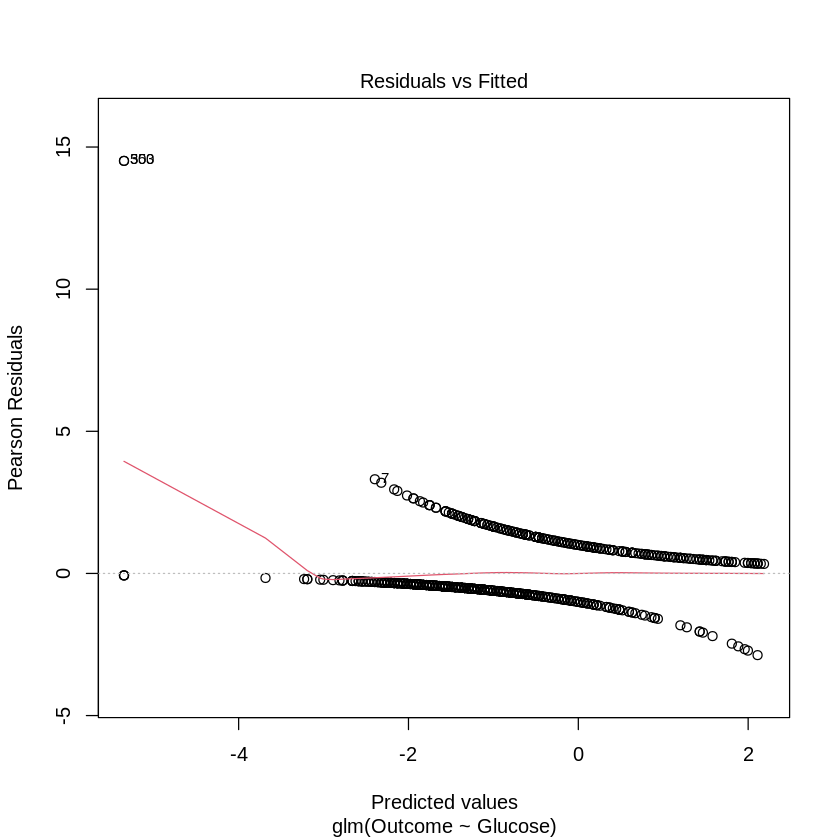

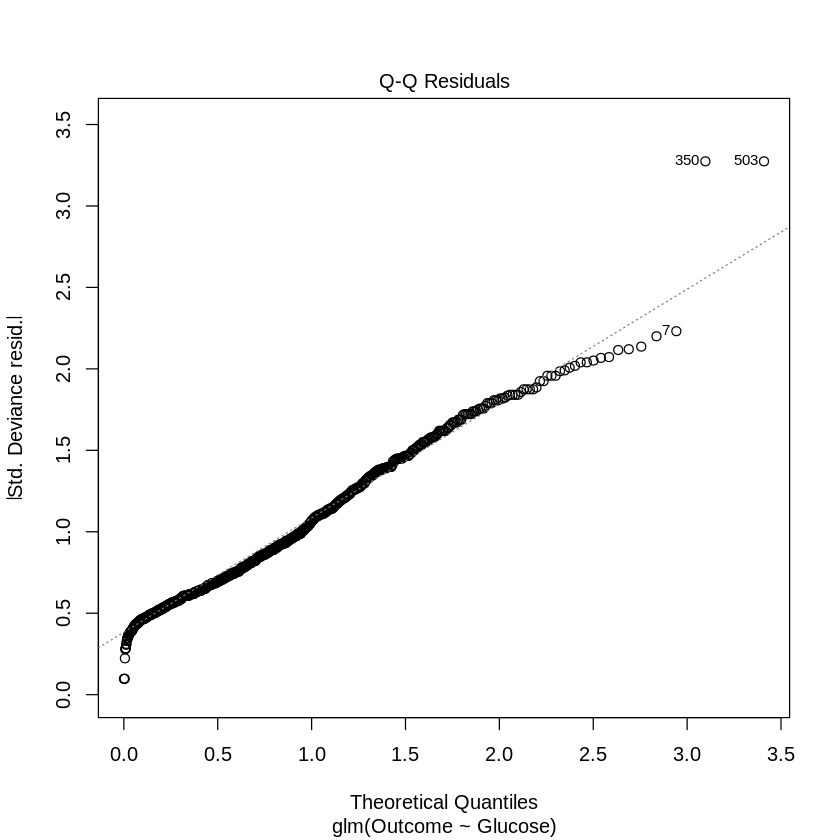

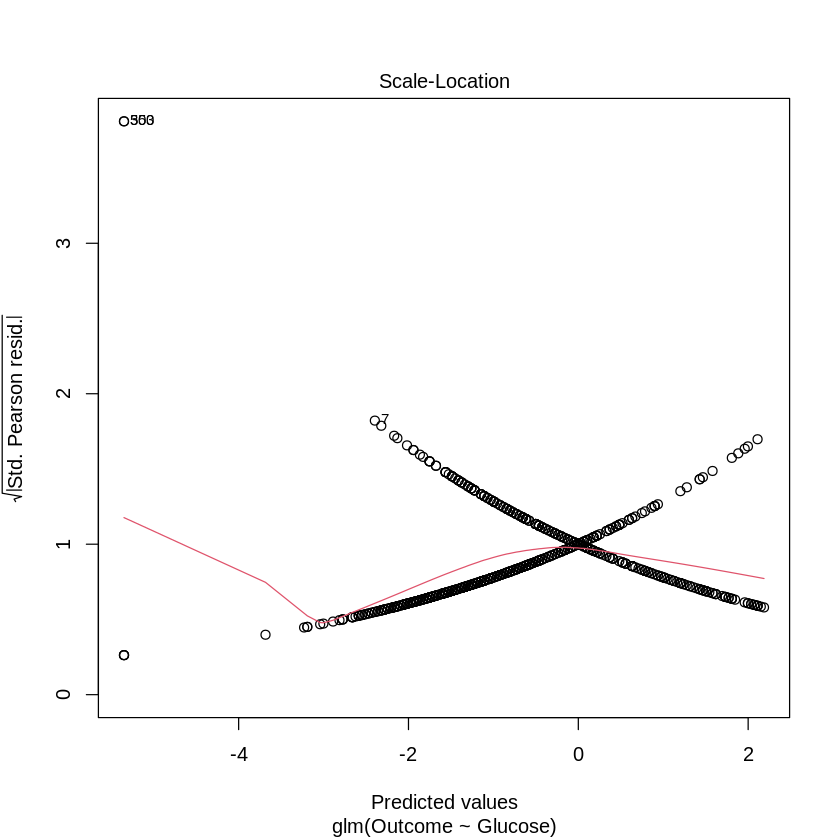

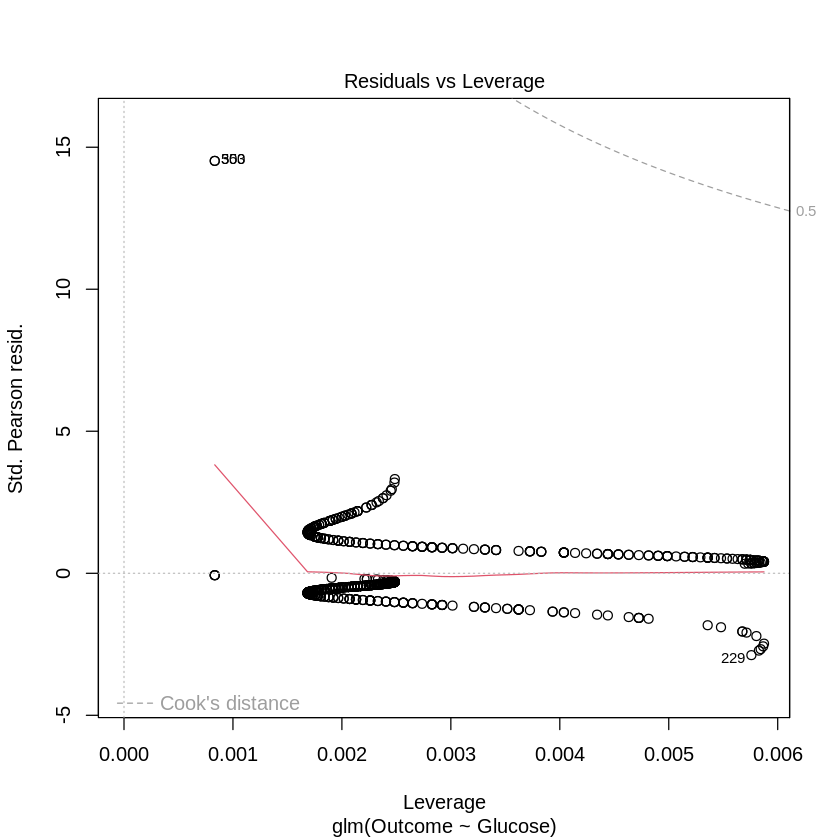

In [43]:
plot(diabetes_model)

###### **Figure 1- 4.** Plot for the Logistic Regression Model

To evaluate the logistic regression model based on glucose levels, this study examines the  four standard diagnostic plots generated.

Figure 1 tackles on the Residuals vs. Fitted plot. The data above shows the spread of deviance residuals against the predicted value. In this case, the residuals generally center around zero but there are noticeable trends and some curvature, especially at the extremes of the predicted values. This means that there are potential non-linearity or a variable bias, **indicating that glucose alone may not be able to capture the true complexity of the diabetes.**

Figure 2 shows the Normal q-q plot. The data above shows a pattern that residuals are not perfectly distributed among the range, and most of the values are secluded around 0 to 2. Although this is the case, this is somewhat expected in logistic regression due to the binary nature of the outcome.

Figure 3 describes the Scale-Location plot. Based on the figure, it appears that there is an "X" shaped pattern, which could indicate heteroscedasticity or unequal variance of residuals across predicted value. This is the cause because the model fit may be improved by more predictors, since residual spread increases at both low and high ends of predicted probabilities.

Lastly, figure 4 shows the Residuals vs Leverage plot. Based on the graph, although most observations cluster near the center with low leverage, a small number of points are shown as outliers which provides a small influence on the model estimates.


### Bootstrap Resampling

Following the diagnostic assessment of the logistic regression model, it was evident that there may be indicators of potential variance.

To further assess the stability and reliability of the estimated regression coefficient, since the data shows a limited amount, this study applies the bootstrap resampling method using 10,000 resamples.

In [16]:
diabetes_model <- glm(Outcome ~ Glucose, data = diabetes_df, family = "binomial")
original_coef <- coef(diabetes_model)["Glucose"]


set.seed(777)
n <- nrow(diabetes_df)
B <- 10000
bootstrap_coefs <- numeric(B)

for (i in 1:B) {
  indices <- sample(1:n, size = n, replace = TRUE)
  sample_data <- diabetes_df[indices, ]
  model <- glm(Outcome ~ Glucose, data = sample_data, family = "binomial")
  bootstrap_coefs[i] <- coef(model)["Glucose"]
}

bootstrap_mean <- mean(bootstrap_coefs)
bootstrap_bias <- bootstrap_mean - original_coef
bootstrap_var <- var(bootstrap_coefs)


cat("Mean Coefficient   :", round(bootstrap_mean, 6), "\n")
cat("Bias Estimate      :", round(bootstrap_bias, 6), "\n")
cat("Variance Estimate  :", round(bootstrap_var, 6), "\n\n")

Mean Coefficient   : 0.03811 
Bias Estimate      : 0.000237 
Variance Estimate  : 1.4e-05 



Using bootstrap resampling with glucose as the only predictor, this study focused on the mean coefficient estimate, bias, and variance of the logistic regression coefficient. The results indicated a mean coefficient of 0.03811, which is closely aligned with the original coefficient from the logistic regression model (approximately 0.03787). This suggests that the coefficient estimate is consistent across multiple resamples of the dataset.

In addition, the bias estimate shows to be 0.000237, indicating a very small value for bias, reinforcing the reliability of the coefficient.

Lastly, the  variance estimate was 1.4e-04, reflecting a relatively low variance in the coefficient across bootstrap samples. This suggests that the regression coefficient remains stable after 10,000 resamples, strengthening the conclusion of the reliability of the glucose.

Although the value shows a reliable estimate, further analysis could expand to explore a higher chance of predictor. Based on the permutation testing from the previous task, apart from

In [42]:
model_gluc_bmi <- glm(Outcome ~ Glucose + BMI, data = diabetes_df, family = "binomial")
orig_coef_gluc_bmi <- coef(model_gluc_bmi)[2]

boot_coefs_gluc_bmi <- replicate(B, {
  sample_indices <- sample(nrow(diabetes_df), replace = TRUE)
  sample_data <- diabetes_df[sample_indices, ]
  coef(glm(Outcome ~ Glucose + BMI, data = sample_data, family = "binomial"))[2]
})

boot_bias_gluc_bmi <- mean(boot_coefs_gluc_bmi) - orig_coef_gluc_bmi
boot_var_gluc_bmi <- var(boot_coefs_gluc_bmi)

cat("Bootstrap (w BMI):\n")
cat("Original Coefficient (w BMI):", orig_coef_gluc_bmi, "\n")
cat("Bootstrap Mean Coefficient (w BMI):", mean(boot_coefs_gluc_bmi), "\n")
cat("Bootstrap Bias Estimate (w BMI):", boot_bias_gluc_bmi, "\n")
cat("Bootstrap Variance Estimate (w BMI):", boot_var_gluc_bmi, "\n\n")


Bootstrap (w BMI):
Original Coefficient (w BMI): 0.03516896 
Bootstrap Mean Coefficient (w BMI): 0.03536521 
Bootstrap Bias Estimate (w BMI): 0.0001962528 
Bootstrap Variance Estimate (w BMI): 1.364436e-05 



In [18]:
model_gluc_ins <- glm(Outcome ~ Glucose + Insulin, data = diabetes_df, family = "binomial")
orig_coef_gluc_ins <- coef(model_gluc_ins)[2]

boot_coefs_gluc_ins <- replicate(B, {
  sample_indices <- sample(nrow(diabetes_df), replace = TRUE)
  sample_data <- diabetes_df[sample_indices, ]
  coef(glm(Outcome ~ Glucose + Insulin, data = sample_data, family = "binomial"))[2]
})

boot_bias_gluc_ins <- mean(boot_coefs_gluc_ins) - orig_coef_gluc_ins
boot_var_gluc_ins <- var(boot_coefs_gluc_ins)

cat("Bootstrap (w Insulin):\n")
cat("Original Coefficient (w Insulin):", orig_coef_gluc_ins, "\n")
cat("Bootstrap Mean Coefficient (w Insulin):", mean(boot_coefs_gluc_ins), "\n")
cat("Bootstrap Bias Estimate (w):", boot_bias_gluc_ins, "\n")
cat("Bootstrap Variance Estimate (w Insulin):", boot_var_gluc_ins, "\n")

Bootstrap (w Insulin):
Original Coefficient (w Insulin): 0.03888507 
Bootstrap Mean Coefficient (w Insulin): 0.03916092 
Bootstrap Bias Estimate (w): 0.0002758537 
Bootstrap Variance Estimate (w Insulin): 1.532524e-05 


In [20]:
# for visualization only
coef_glucose_only <- numeric(B)
coef_glucose_bmi <- numeric(B)
coef_glucose_insulin <- numeric(B)

for (i in 1:B) {
  idx <- sample(1:n, size = n, replace = TRUE)
  sample_df <- diabetes_df[idx, ]

  model1 <- glm(Outcome ~ Glucose, data = sample_df, family = "binomial")
  coef_glucose_only[i] <- coef(model1)["Glucose"]

  model2 <- glm(Outcome ~ Glucose + BMI, data = sample_df, family = "binomial")
  coef_glucose_bmi[i] <- coef(model2)["Glucose"]

  model3 <- glm(Outcome ~ Glucose + Insulin, data = sample_df, family = "binomial")
  coef_glucose_insulin[i] <- coef(model3)["Glucose"]
}



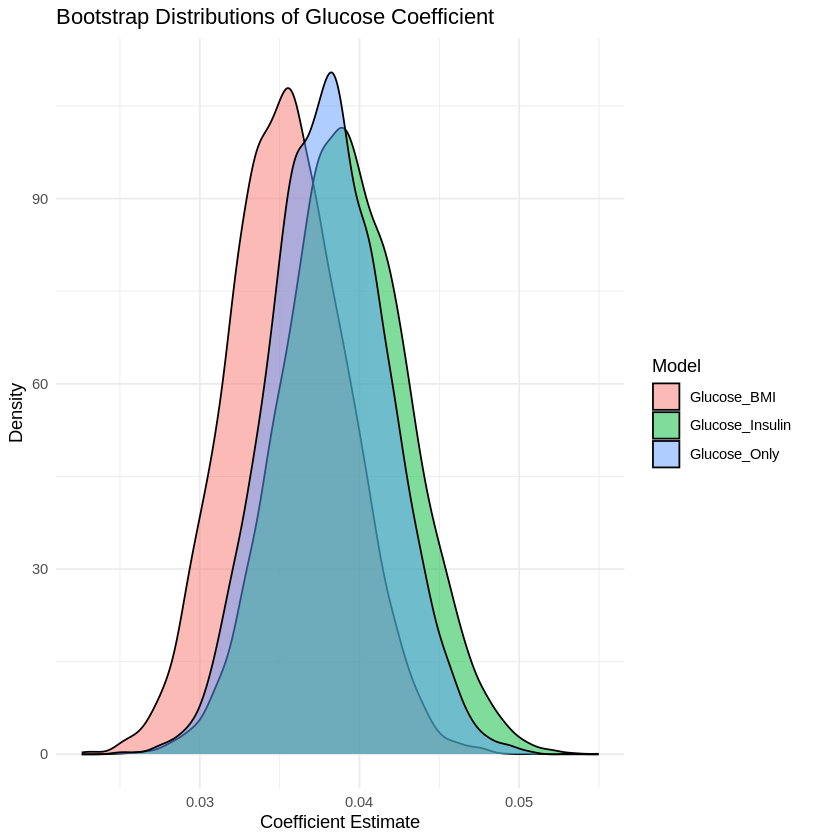

In [21]:
bootstrap_df <- data.frame(
  Glucose_Only = coef_glucose_only,
  Glucose_BMI = coef_glucose_bmi,
  Glucose_Insulin = coef_glucose_insulin
)
long_df <- pivot_longer(bootstrap_df, cols = everything(), names_to = "Model", values_to = "Estimate")

ggplot(long_df, aes(x = Estimate, fill = Model)) +
  geom_density(alpha = 0.5) +
  theme_minimal() +
  labs(title = "Bootstrap Distributions of Glucose Coefficient",
       x = "Coefficient Estimate", y = "Density") +
  scale_fill_manual(values = c("#F8766D", "#00BA38", "#619CFF"))

In [22]:
model_gluc <- glm(Outcome ~ Glucose, data = diabetes_df, family = "binomial")
model_gluc_bmi <- glm(Outcome ~ Glucose + BMI, data = diabetes_df, family = "binomial")
model_gluc_insulin <- glm(Outcome ~ Glucose + Insulin, data = diabetes_df, family = "binomial")

cat("Original (theoretical) Coefficient Estimates:\n")
cat("Glucose only: ", coef(model_gluc)["Glucose"], "\n")
cat("Glucose + BMI: ", coef(model_gluc_bmi)["Glucose"], "\n")
cat("Glucose + Insulin: ", coef(model_gluc_insulin)["Glucose"], "\n")

Original (theoretical) Coefficient Estimates:
Glucose only:  0.03787304 
Glucose + BMI:  0.03516896 
Glucose + Insulin:  0.03888507 


In [23]:
se_glucose_only <- sd(coef_glucose_only)
se_glucose_bmi <- sd(coef_glucose_bmi)
se_glucose_insulin <- sd(coef_glucose_insulin)

cat("Bootstrap Standard Errors:\n")
cat("Glucose only: ", se_glucose_only, "\n")
cat("Glucose + BMI: ", se_glucose_bmi, "\n")
cat("Glucose + Insulin: ", se_glucose_insulin, "\n")

Bootstrap Standard Errors:
Glucose only:  0.003646946 
Glucose + BMI:  0.003682998 
Glucose + Insulin:  0.003923802 


In [24]:
ci_glucose_only <- quantile(coef_glucose_only, c(0.025, 0.975))
ci_glucose_bmi <- quantile(coef_glucose_bmi, c(0.025, 0.975))
ci_glucose_insulin <- quantile(coef_glucose_insulin, c(0.025, 0.975))

cat("Bootstrap 95% Confidence Intervals (Percentile Method):\n")
cat("Glucose only: ", ci_glucose_only, "\n")
cat("Glucose + BMI: ", ci_glucose_bmi, "\n")
cat("Glucose + Insulin: ", ci_glucose_insulin, "\n")

Bootstrap 95% Confidence Intervals (Percentile Method):
Glucose only:  0.03121598 0.04537643 
Glucose + BMI:  0.02852419 0.04278519 
Glucose + Insulin:  0.03172055 0.04702363 


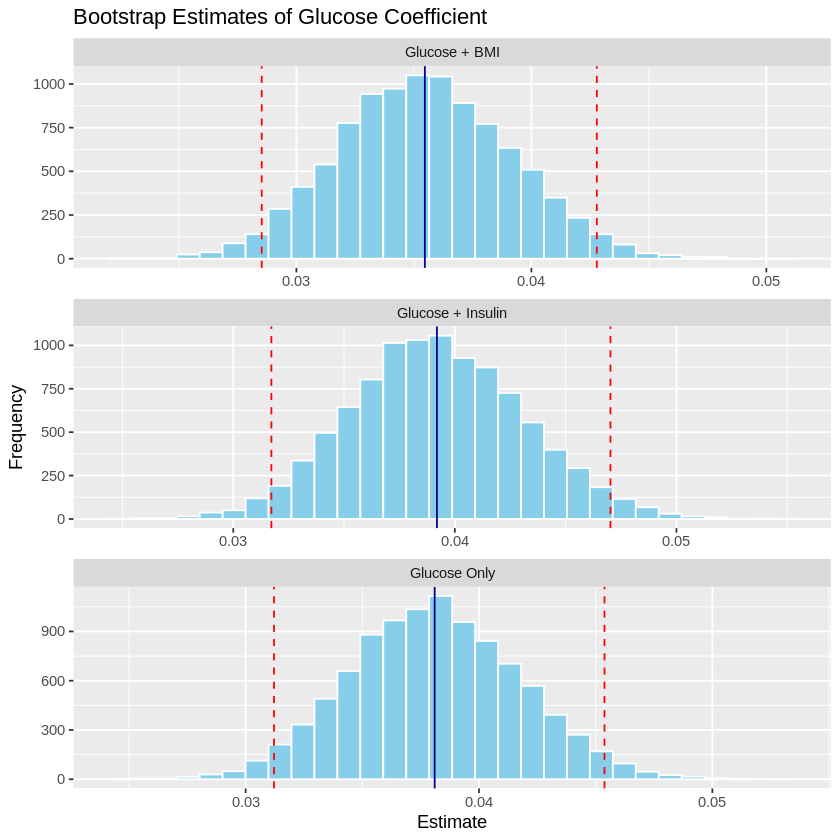

In [25]:
df_bootstrap <- bind_rows(
  data.frame(value = coef_glucose_only, model = "Glucose Only"),
  data.frame(value = coef_glucose_bmi, model = "Glucose + BMI"),
  data.frame(value = coef_glucose_insulin, model = "Glucose + Insulin")
)


ci_df <- df_bootstrap %>%
  group_by(model) %>%
  summarise(
    lower = quantile(value, 0.025),
    upper = quantile(value, 0.975),
    mean = mean(value)
  )


ggplot(df_bootstrap, aes(x = value)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "white") +
  geom_vline(data = ci_df, aes(xintercept = lower), color = "red", linetype = "dashed") +
  geom_vline(data = ci_df, aes(xintercept = upper), color = "red", linetype = "dashed") +
  geom_vline(data = ci_df, aes(xintercept = mean), color = "darkblue", linetype = "solid") + facet_wrap(~model, scales = "free", nrow = 3) +
  labs(title = "Bootstrap Estimates of Glucose Coefficient",
       x = "Estimate",
       y = "Frequency")


In [26]:
set.seed(777)

n <- nrow(diabetes_df)

original_model <- glm(Outcome ~ Glucose, data = diabetes_df, family = binomial)
original_coef <- coef(original_model)["Glucose"]

jackknife_coefs <- numeric(n)

for (i in 1:n) {
  jack_data <- diabetes_df[-i, ]
  jack_model <- glm(Outcome ~ Glucose, data = jack_data, family = binomial)
  jackknife_coefs[i] <- coef(jack_model)["Glucose"]
}

jackknife_mean <- mean(jackknife_coefs)
jackknife_bias <- (n - 1) * (jackknife_mean - original_coef)
jackknife_variance <- ((n - 1) / n) * sum((jackknife_coefs - jackknife_mean)^2)



cat("Original Coefficient     :", original_coef, "\n")
cat("Jackknife Mean Coef      :", jackknife_mean, "\n")
cat("Jackknife Bias Estimate  :", jackknife_bias, "\n")
cat("Jackknife Variance       :", format(jackknife_variance, scientific = TRUE), "\n")


Original Coefficient     : 0.03787304 
Jackknife Mean Coef      : 0.03787334 
Jackknife Bias Estimate  : 0.0002308984 
Jackknife Variance       : 1.342065e-05 


In [27]:
original_model_glucose_bmi <- glm(Outcome ~ Glucose + BMI, data = diabetes_df, family = binomial)
original_coef_glucose_bmi <- coef(original_model_glucose_bmi)["Glucose"]

jackknife_glucose_bmi <- numeric(n)
for (i in 1:n) {
  jack_data <- diabetes_df[-i, ]
  jack_model <- glm(Outcome ~ Glucose + BMI, data = jack_data, family = binomial)
  jackknife_glucose_bmi[i] <- coef(jack_model)["Glucose"]
}

jack_mean_glucose_bmi <- mean(jackknife_glucose_bmi)
jack_bias_glucose_bmi <- (n - 1) * (jack_mean_glucose_bmi - original_coef_glucose_bmi)
jack_var_glucose_bmi <- ((n - 1) / n) * sum((jackknife_glucose_bmi - jack_mean_glucose_bmi)^2)

cat("Jackknife (Glucose w/ BMI):\n")
cat("Jackknife Mean Coef (Glucose w BMI)    :", jack_mean_glucose_bmi, "\n")
cat("Jackknife Bias Estimate (Glucose w BMI):", jack_bias_glucose_bmi, "\n")
cat("Jackknife Variance Estimate (Glucose w BMI):", format(jack_var_glucose_bmi, scientific = TRUE), "\n\n")


Jackknife (Glucose w/ BMI):
Jackknife Mean Coef (Glucose w BMI)    : 0.03516934 
Jackknife Bias Estimate (Glucose w BMI): 0.0002922572 
Jackknife Variance Estimate (Glucose w BMI): 1.367933e-05 



In [28]:
original_model_glucose_insulin <- glm(Outcome ~ Glucose + Insulin, data = diabetes_df, family = binomial)
original_coef_glucose_insulin <- coef(original_model_glucose_insulin)["Glucose"]

jackknife_glucose_insulin <- numeric(n)
for (i in 1:n) {
  jack_data <- diabetes_df[-i, ]
  jack_model <- glm(Outcome ~ Glucose + Insulin, data = jack_data, family = binomial)
  jackknife_glucose_insulin[i] <- coef(jack_model)["Glucose"]
}

jack_mean_glucose_insulin <- mean(jackknife_glucose_insulin)
jack_bias_glucose_insulin <- (n - 1) * (jack_mean_glucose_insulin - original_coef_glucose_insulin)
jack_var_glucose_insulin <- ((n - 1) / n) * sum((jackknife_glucose_insulin - jack_mean_glucose_insulin)^2)

cat("Jackknife (Glucose w/ Insulin):\n")
cat("Jackknife Mean Coef (Glucose w Insulin)    :", jack_mean_glucose_insulin, "\n")
cat("Jackknife Bias Estimate (Glucose w Insulin):", jack_bias_glucose_insulin, "\n")
cat("Jackknife Variance Estimate (Glucose w Insulin):", format(jack_var_glucose_insulin, scientific = TRUE), "\n\n")

Jackknife (Glucose w/ Insulin):
Jackknife Mean Coef (Glucose w Insulin)    : 0.03888548 
Jackknife Bias Estimate (Glucose w Insulin): 0.0003151924 
Jackknife Variance Estimate (Glucose w Insulin): 1.553018e-05 



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


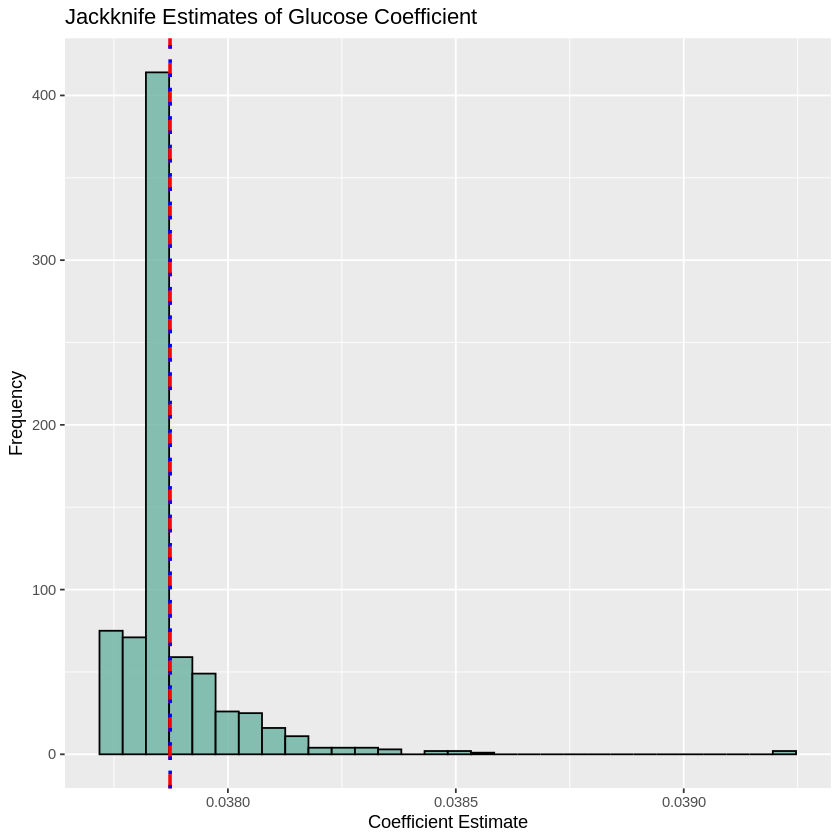

In [29]:
jackknife_df <- data.frame(glucose_coef = jackknife_coefs)

ggplot(jackknife_df, aes(x = glucose_coef)) +
  geom_histogram(bins = 30, fill = "#69b3a2", color = "black", alpha = 0.8) +
  geom_vline(aes(xintercept = original_coef), color = "red", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = jackknife_mean), color = "blue", linetype = "dotted", size = 1) +
  labs(
    title = "Jackknife Estimates of Glucose Coefficient",
    x = "Coefficient Estimate",
    y = "Frequency"
  )

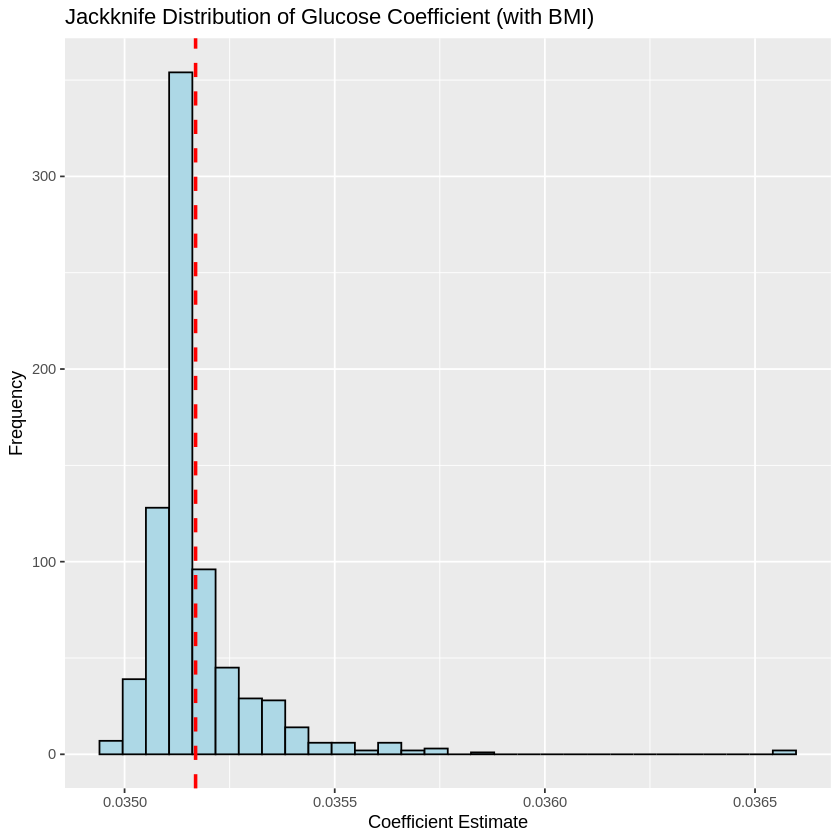

In [30]:
ggplot(data.frame(Coefficient = jackknife_glucose_bmi), aes(x = Coefficient)) +
  geom_histogram(color = "black", fill = "lightblue", bins = 30) +
  geom_vline(xintercept = original_coef_glucose_bmi, color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Jackknife Distribution of Glucose Coefficient (with BMI)",
    x = "Coefficient Estimate",
    y = "Frequency"
  )


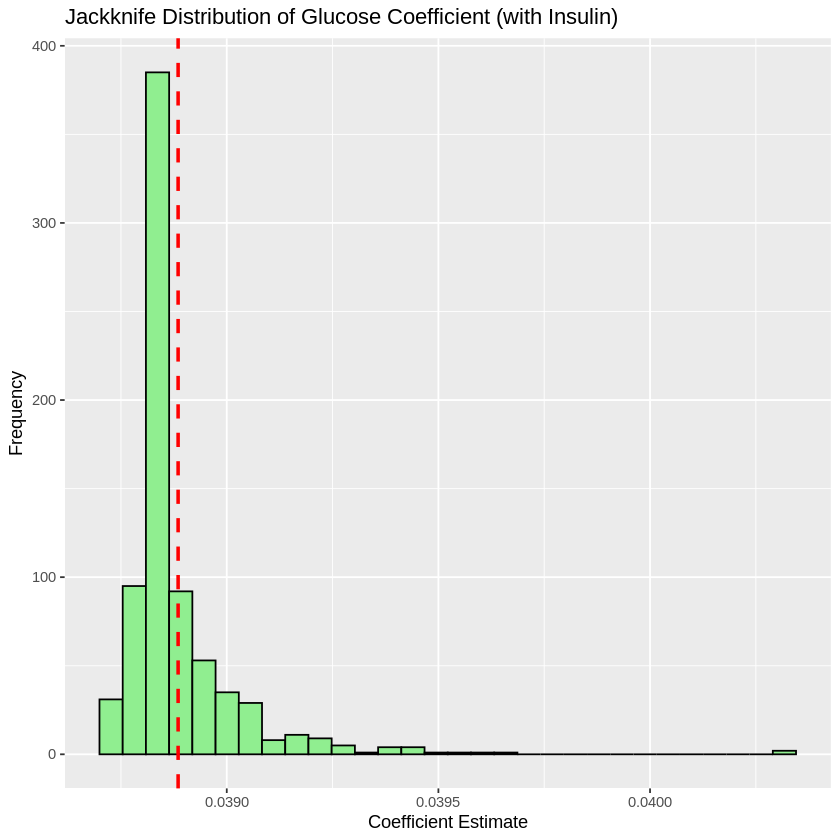

In [31]:
ggplot(data.frame(Coefficient = jackknife_glucose_insulin), aes(x = Coefficient)) +
  geom_histogram(color = "black", fill = "lightgreen", bins = 30) +
  geom_vline(xintercept = original_coef_glucose_insulin, color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Jackknife Distribution of Glucose Coefficient (with Insulin)",
    x = "Coefficient Estimate",
    y = "Frequency"
  )


In [32]:
model_gluc <- glm(Outcome ~ Glucose, data = diabetes_df, family = "binomial")
model_gluc_bmi <- glm(Outcome ~ Glucose + BMI, data = diabetes_df, family = "binomial")
model_gluc_insulin <- glm(Outcome ~ Glucose + Insulin, data = diabetes_df, family = "binomial")

cat("Original (theoretical) Coefficient Estimates:\n")
cat("Glucose only: ", coef(model_gluc)["Glucose"], "\n")
cat("Glucose + BMI: ", coef(model_gluc_bmi)["Glucose"], "\n")
cat("Glucose + Insulin: ", coef(model_gluc_insulin)["Glucose"], "\n")


Original (theoretical) Coefficient Estimates:
Glucose only:  0.03787304 
Glucose + BMI:  0.03516896 
Glucose + Insulin:  0.03888507 


In [33]:
se_jack_glucose_only <- sd(jackknife_coefs)
se_jack_glucose_bmi <- sd(jackknife_glucose_bmi)
se_jack_glucose_insulin <- sd(jackknife_glucose_insulin)

cat("Jackknife Standard Errors:\n")
cat("Glucose only     :", se_jack_glucose_only, "\n")
cat("Glucose + BMI    :", se_jack_glucose_bmi, "\n")
cat("Glucose + Insulin:", se_jack_glucose_insulin, "\n")

Jackknife Standard Errors:
Glucose only     : 0.0001323647 
Glucose + BMI    : 0.0001336342 
Glucose + Insulin: 0.000142388 


In [34]:
ci_jack_glucose_only <- quantile(jackknife_coefs, c(0.025, 0.975))
ci_jack_glucose_bmi <- quantile(jackknife_glucose_bmi, c(0.025, 0.975))
ci_jack_glucose_insulin <- quantile(jackknife_glucose_insulin, c(0.025, 0.975))

cat("Jackknife 95% Confidence Intervals (Percentile Method):\n")
cat("Glucose only: ", ci_jack_glucose_only, "\n")
cat("Glucose + BMI: ", ci_jack_glucose_bmi, "\n")
cat("Glucose + Insulin: ", ci_jack_glucose_insulin, "\n")

Jackknife 95% Confidence Intervals (Percentile Method):
Glucose only:  0.03775619 0.03821105 
Glucose + BMI:  0.03502671 0.03550107 
Glucose + Insulin:  0.0387456 0.03925981 


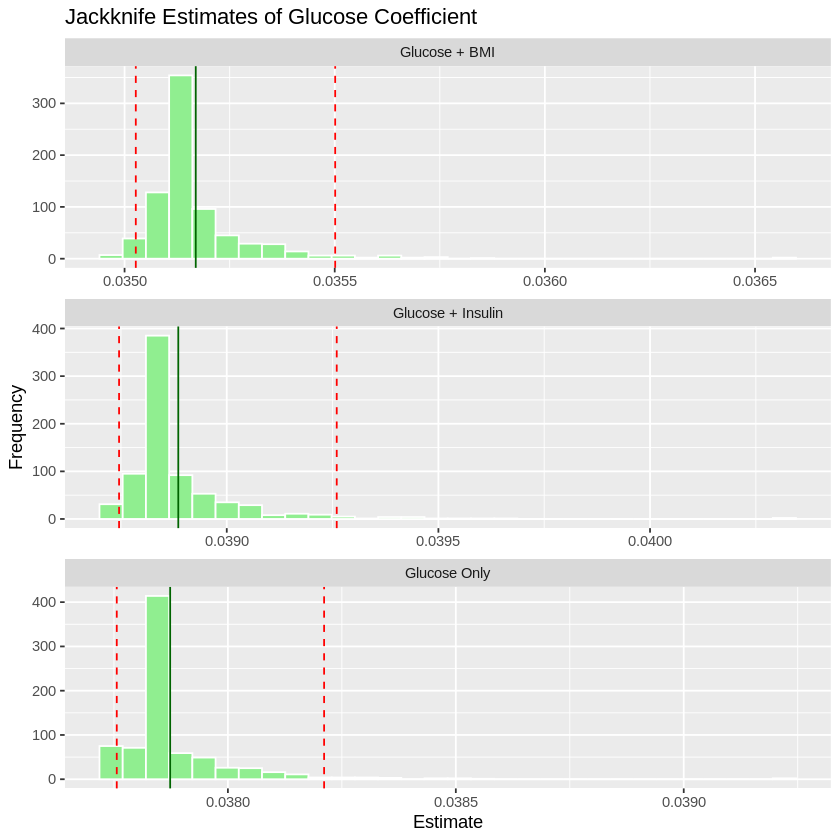

In [35]:
df_jackknife <- bind_rows(
  data.frame(value = jackknife_coefs, model = "Glucose Only"),
  data.frame(value = jackknife_glucose_bmi, model = "Glucose + BMI"),
  data.frame(value = jackknife_glucose_insulin, model = "Glucose + Insulin")
)

ci_df_jack <- df_jackknife %>%
  group_by(model) %>%
  summarise(
    lower = quantile(value, 0.025),
    upper = quantile(value, 0.975),
    mean = mean(value)
  )

ggplot(df_jackknife, aes(x = value)) +
  geom_histogram(bins = 30, fill = "lightgreen", color = "white") +
  geom_vline(data = ci_df_jack, aes(xintercept = lower), color = "red", linetype = "dashed") +
  geom_vline(data = ci_df_jack, aes(xintercept = upper), color = "red", linetype = "dashed") +
  geom_vline(data = ci_df_jack, aes(xintercept = mean), color = "darkgreen", linetype = "solid") +
  facet_wrap(~model, scales = "free", nrow = 3) +
  labs(title = "Jackknife Estimates of Glucose Coefficient",
       x = "Estimate",
       y = "Frequency")

In [37]:
set.seed(777)

B <- 1000
n <- nrow(diabetes_df)

bootstrap_accuracy <- numeric(B)
bootstrap_precision <- numeric(B)
bootstrap_recall <- numeric(B)
bootstrap_f1 <- numeric(B)
bootstrap_rmse <- numeric(B)

for (b in 1:B) {
  sample_indices <- sample(1:n, size = n, replace = TRUE)
  boot_data <- diabetes_df[sample_indices, ]

  model <- glm(Outcome ~ Glucose, data = boot_data, family = binomial)

  oob_indices <- setdiff(1:n, unique(sample_indices))

  if (length(oob_indices) > 0) {
    oob_data <- diabetes_df[oob_indices, ]

    probs <- predict(model, newdata = oob_data, type = "response")
    preds <- ifelse(probs > 0.5, 1, 0)
    truth <- oob_data$Outcome

    conf <- confusionMatrix(as.factor(preds), as.factor(truth), positive = "1")

    bootstrap_accuracy[b] <- conf$overall["Accuracy"]
    bootstrap_precision[b] <- conf$byClass["Precision"]
    bootstrap_recall[b] <- conf$byClass["Recall"]
    bootstrap_f1[b] <- conf$byClass["F1"]

    bootstrap_rmse[b] <- sqrt(mean((probs - truth)^2))
  } else {
    bootstrap_accuracy[b] <- NA
    bootstrap_precision[b] <- NA
    bootstrap_recall[b] <- NA
    bootstrap_f1[b] <- NA
    bootstrap_rmse[b] <- NA
  }
}
bootstrap_accuracy <- na.omit(bootstrap_accuracy)
bootstrap_precision <- na.omit(bootstrap_precision)
bootstrap_recall <- na.omit(bootstrap_recall)
bootstrap_f1 <- na.omit(bootstrap_f1)
bootstrap_rmse <- na.omit(bootstrap_rmse)

In [38]:
cat("Bootstrap Model Performance (Glucose only):\n")
cat("Average Accuracy: ", mean(bootstrap_accuracy), "\n")
cat("Average Precision: ", mean(bootstrap_precision), "\n")
cat("Average Recall: ", mean(bootstrap_recall), "\n")
cat("Average F1 Score: ", mean(bootstrap_f1), "\n")
cat("Average RMSE: ", mean(bootstrap_rmse), "\n")

Bootstrap Model Performance (Glucose only):
Average Accuracy:  0.7432706 
Average Precision:  0.6905673 
Average Recall:  0.4862307 
Average F1 Score:  0.567582 
Average RMSE:  0.4175247 


In [39]:
bootstrap_eval <- function(formula, data, B = 1000) {
  n <- nrow(data)

  acc <- numeric(B)
  prec <- numeric(B)
  rec <- numeric(B)
  f1 <- numeric(B)
  rmse <- numeric(B)

  for (b in 1:B) {
    sample_indices <- sample(1:n, size = n, replace = TRUE)
    boot_data <- data[sample_indices, ]

    model <- glm(formula, data = boot_data, family = binomial)

    oob_indices <- setdiff(1:n, unique(sample_indices))

    if (length(oob_indices) > 0) {
      oob_data <- data[oob_indices, ]
      probs <- predict(model, newdata = oob_data, type = "response")
      preds <- ifelse(probs > 0.5, 1, 0)
      truth <- oob_data$Outcome

      conf <- confusionMatrix(as.factor(preds), as.factor(truth), positive = "1")

      acc[b] <- conf$overall["Accuracy"]
      prec[b] <- conf$byClass["Precision"]
      rec[b] <- conf$byClass["Recall"]
      f1[b] <- conf$byClass["F1"]
      rmse[b] <- sqrt(mean((probs - truth)^2))
    } else {
      acc[b] <- prec[b] <- rec[b] <- f1[b] <- rmse[b] <- NA
    }
  }

  list(
    Accuracy = mean(na.omit(acc)),
    Precision = mean(na.omit(prec)),
    Recall = mean(na.omit(rec)),
    F1 = mean(na.omit(f1)),
    RMSE = mean(na.omit(rmse))
  )
}

In [40]:
set.seed(777)

result_glucose <- bootstrap_eval(Outcome ~ Glucose, data = diabetes_df)
result_glucose_bmi <- bootstrap_eval(Outcome ~ Glucose + BMI, data = diabetes_df)
result_glucose_insulin <- bootstrap_eval(Outcome ~ Glucose + Insulin, data = diabetes_df)
result_all <- bootstrap_eval(Outcome ~ Glucose + BMI + Insulin, data = diabetes_df)


In [41]:
results <- rbind(
  Glucose = unlist(result_glucose),
  Glucose_BMI = unlist(result_glucose_bmi),
  Glucose_Insulin = unlist(result_glucose_insulin),
  Glucose_BMI_Insulin = unlist(result_all)
)

print(round(results, 4))

                    Accuracy Precision Recall     F1   RMSE
Glucose               0.7433    0.6906 0.4862 0.5676 0.4175
Glucose_BMI           0.7632    0.7198 0.5313 0.6088 0.4065
Glucose_Insulin       0.7417    0.6889 0.4816 0.5642 0.4175
Glucose_BMI_Insulin   0.7585    0.7105 0.5276 0.6027 0.4076
